In [1]:
import sys
sys.path.append('../')
%load_ext autotime
import numpy as np

time: 140 ms (started: 2024-05-01 13:58:26 -07:00)


In [2]:
import plotters.plot_rydberg_dynamics as rydnamics

time: 8.76 s (started: 2024-05-01 13:58:26 -07:00)


In [3]:
import models.rydberg_calcs as ryd
transition47 = ryd.RydbergTransition(laserWaist=25e-6, n1=6, l1=0, j1=0.5,
                 mj1=0.5, n2=7, l2=1, j2=1.5, mj2=1.5, n3=47, l3=2, j3=2.5)

transition47.print_laser_frequencies(Pp=0.01, Pc=2)

Probe laser frequency 657932.3889647021 GHz
Couple laser frequency 281946.99689916975 GHz

Optimal detuning 4.590515545681605 GHz 

Optimal probe frequency 657937.1994802478 GHz
Optimal couple frequency 281942.51638362405 GHz

Expected Rabi Frequency = 2*pi 23.55076925140413 MHz
Pi Pulse Duration 21.23072901197014 ns
time: 9.86 s (started: 2024-05-01 13:58:35 -07:00)


In [4]:
transition40 = ryd.RydbergTransition(laserWaist=25e-6, n1=6, l1=0, j1=0.5,
                 mj1=0.5, n2=7, l2=1, j2=1.5, mj2=1.5, q2=-1, n3=40, l3=0, j3=0.5)

transition40.print_laser_frequencies(Pp=0.01, Pc=2)

Probe laser frequency 657932.3889647021 GHz
Couple laser frequency 281060.35612286313 GHz

Optimal detuning 2.8372142670646174 GHz 

Optimal probe frequency 657935.4461789693 GHz
Optimal couple frequency 281057.62890859606 GHz

Expected Rabi Frequency = 2*pi 22.65253998215632 MHz
Pi Pulse Duration 22.07257995764961 ns
time: 9.83 s (started: 2024-05-01 13:58:45 -07:00)


In [5]:
transition40.print_tweezer_stark_shift(tweezer_power=0.010)

Transition Frequency (GHz) 281060.35612286313
Tweezer Frequency (GHz) 280234.4385346657
Tweezer Detuning (GHz) 825.9175881974688
Tweezer Stark Shift (MHz) 0.14508332722383105
time: 182 ms (started: 2024-05-01 13:58:55 -07:00)


In [6]:
transition40.print_ac_stark_shift(Pp=0.010, Pc=2)

Differential Stark Shift (MHz) 23.006964023705514
Stark Shift 1 (MHz) 9.492087847045106
Stark Shift 2 (MHz) 13.514876176660406
time: 235 ms (started: 2024-05-01 13:58:55 -07:00)


In [7]:
transition41 = ryd.RydbergTransition(laserWaist=25e-6, n1=6, l1=0, j1=0.5,
                 mj1=0.5, n2=7, l2=1, j2=1.5, mj2=1.5, q2=-1, n3=41, l3=0, j3=0.5)

transition41.print_laser_frequencies(Pp=0.01, Pc=2)

Probe laser frequency 657932.3889647021 GHz
Couple laser frequency 281196.26936566306 GHz

Optimal detuning 2.8668682014805937 GHz 

Optimal probe frequency 657935.4758329036 GHz
Optimal couple frequency 281193.5124974616 GHz

Expected Rabi Frequency = 2*pi 21.49744746321604 MHz
Pi Pulse Duration 23.25857527297334 ns
time: 10.5 s (started: 2024-05-01 13:58:55 -07:00)


# State Dynamics

Important note: To account for the detuning from resonance by the AC Stark shift, to first order, we set $\delta = \frac{\Omega_{23}^2}{4\Delta}$ to obtain much better conversion to the Rydberg state at the optimal detuning $\Delta > 0$.

Test self-consistency of state evolution, von Neumann solver, and full Lindblad solver

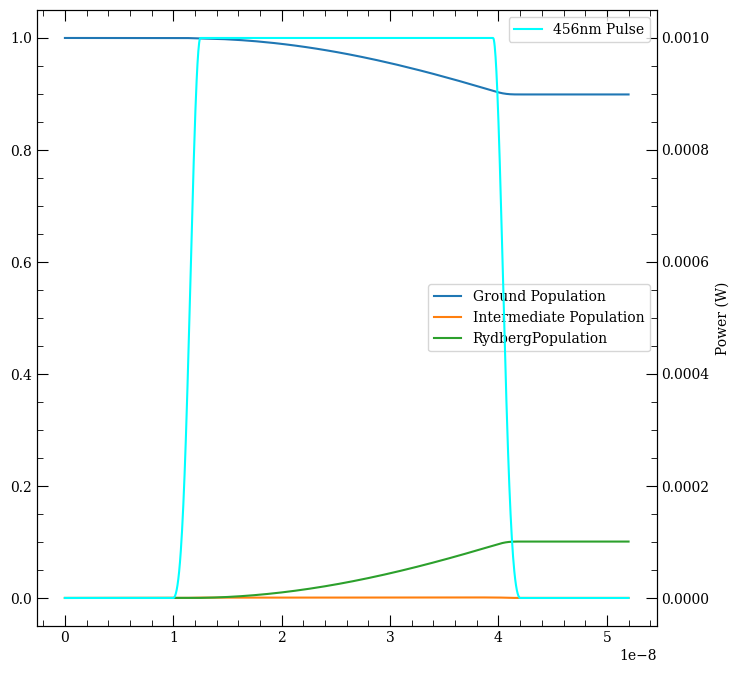

time: 9.6 s (started: 2024-04-22 16:24:52 -07:00)


In [3]:
rydnamics.plot_state_dynamics()

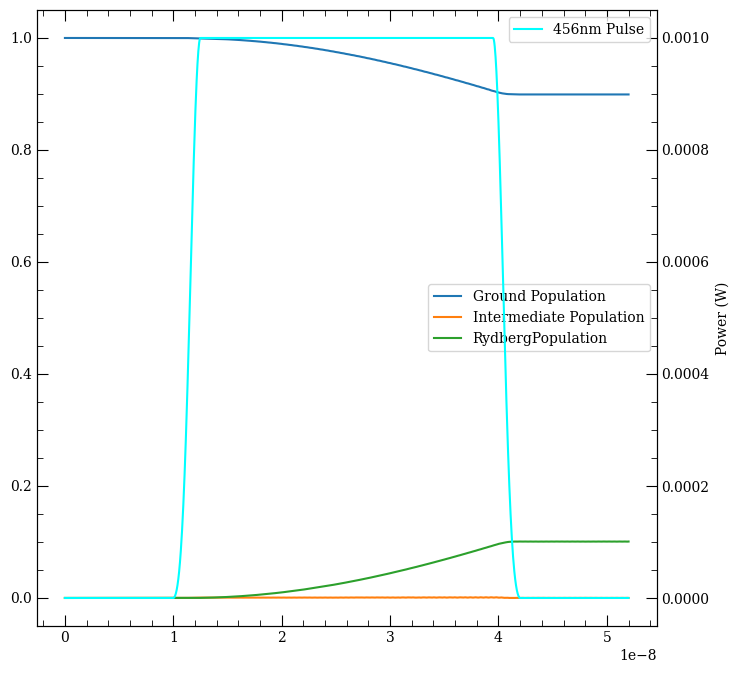

time: 10.3 s (started: 2024-04-22 16:25:02 -07:00)


In [4]:
rydnamics.plot_rho_dynamics()

At "optimal" detuning, do pi pulse durations match those calculated from theory as we change the 456nm peak power?

100%|███████████████████████████████████████████████████████████████| 20/20 [03:23<00:00, 10.16s/it]


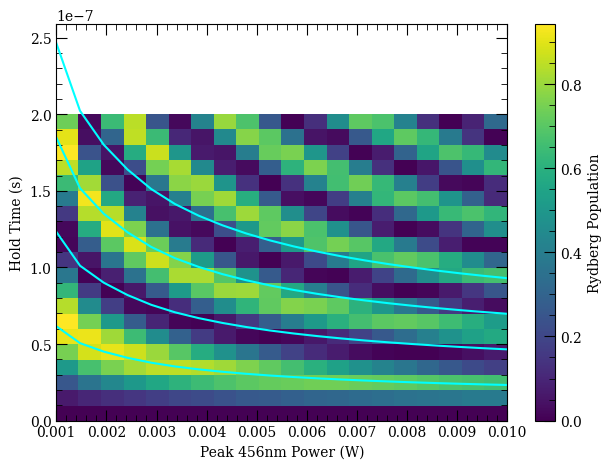

time: 3min 34s (started: 2024-04-22 16:25:12 -07:00)


In [5]:
rydnamics.plot_state_hold_vs_probe_power()

Observe how the Rydberg conversion efficiency decreases as the laser powers move away from the point where the pi pulse duration was calculated (indicated by the X).

100%|███████████████████████████████████████████████████████████████| 20/20 [02:24<00:00,  7.23s/it]


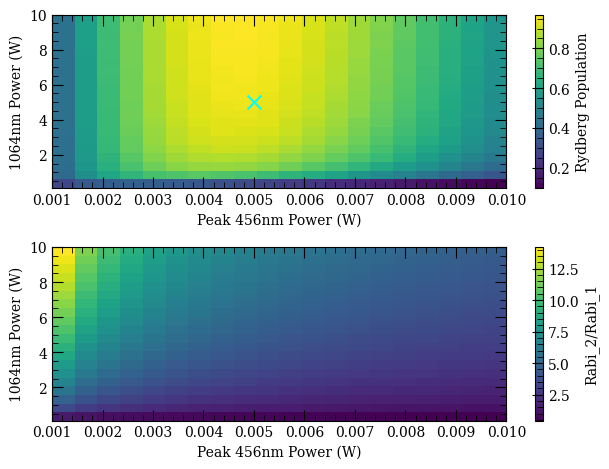

time: 2min 33s (started: 2024-04-22 16:28:46 -07:00)


In [6]:
rydnamics.plot_state_power_vs_power_fixed_pi()

We have a lot more spare 1064nm power to play with than 456nm power (to keep the Rabi frequencies balanced). Let's see how mismatched the laser powers have to be before our "optimal" detuning is no longer close to optimal for a perfect (square) pi pulse at a fixed 456nm peak power.

100%|███████████████████████████████████████████████████████████████| 25/25 [03:21<00:00,  8.07s/it]


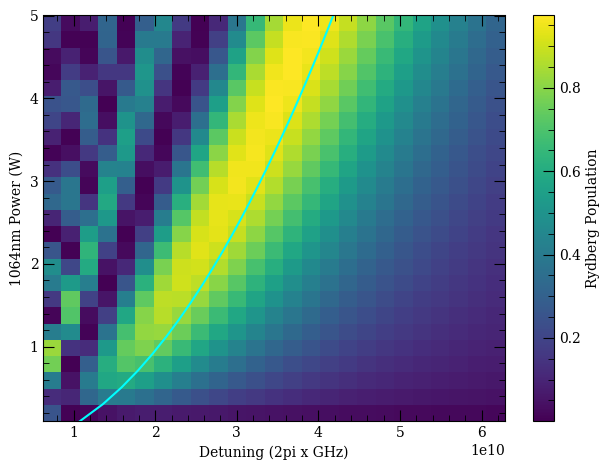

time: 3min 30s (started: 2024-04-22 16:33:00 -07:00)


In [9]:
coupling_powers = np.linspace(0.1, 5, 25)
detunings = np.linspace(2 * np.pi * 1e9, 2 * np.pi * 10e9, 25)
probe_peak_power = 5e-3
rydnamics.plot_state_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power, duration=0)

What if we allow a finite turn on time? Since the pulse area is no longer equal to that of a pi pulse, there will be a shift of the proper detuning from "optimal". This illustrates how it is important to characterize AOM turn on/off times.

100%|███████████████████████████████████████████████████████████████| 25/25 [07:14<00:00, 17.39s/it]


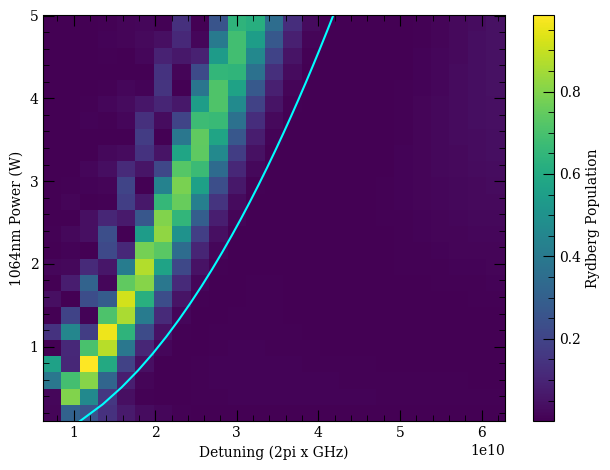

time: 7min 23s (started: 2024-04-22 16:36:53 -07:00)


In [10]:
coupling_powers = np.linspace(0.1, 5, 25)
detunings = np.linspace(2 * np.pi * 1e9, 2 * np.pi * 10e9, 25)
probe_peak_power = 5e-3
rydnamics.plot_state_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power, duration=50e-9)

## Lindblad Master Equation

Now, let's add in the loss. We add in the jump operators to a fourth, heuristic loss channel.

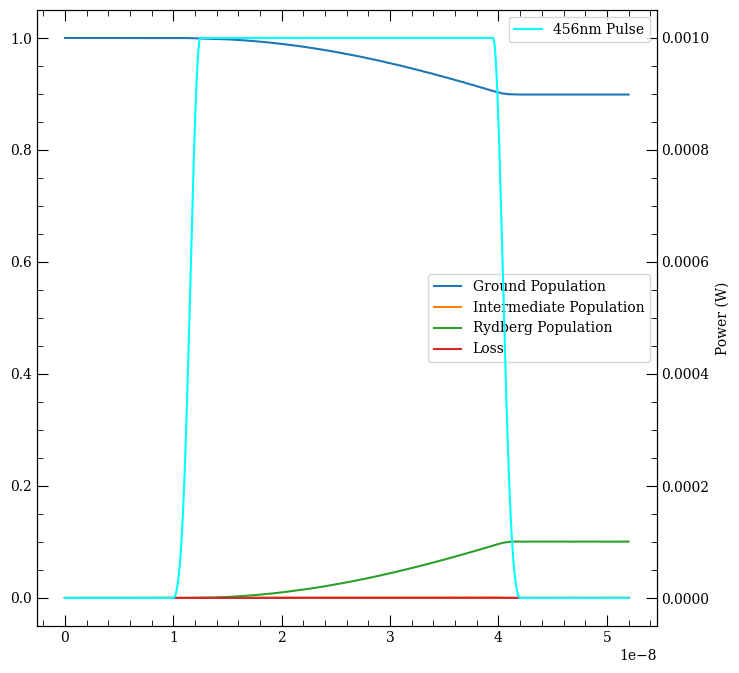

time: 10.5 s (started: 2024-04-22 17:09:27 -07:00)


In [3]:
rydnamics.plot_lindblad_dynamics()

Let's see how including the loss affects the choice of detuning with a perfect pi pulse at the "optimal" detuning.

100%|███████████████████████████████████████████████████████████████| 25/25 [06:48<00:00, 16.36s/it]


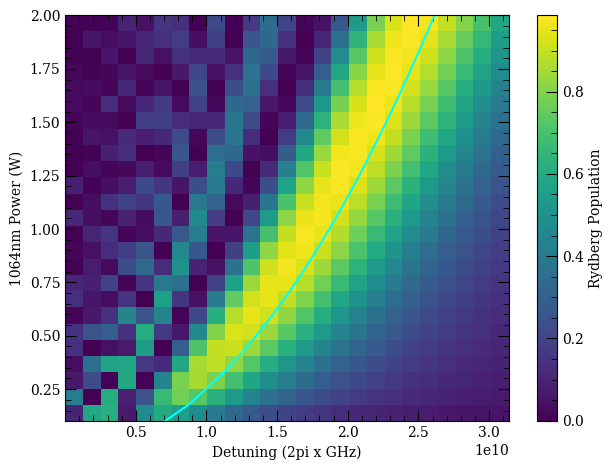

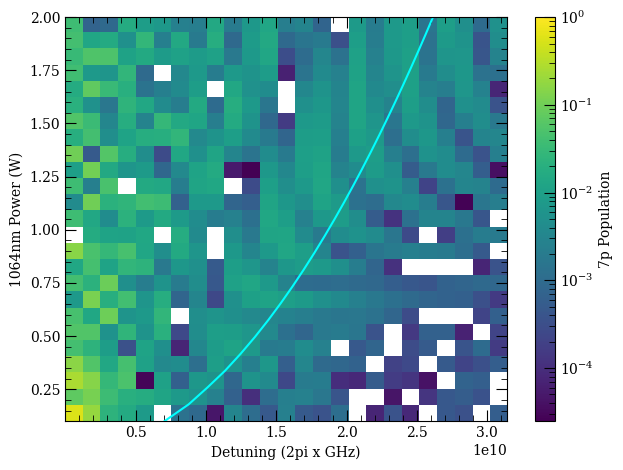

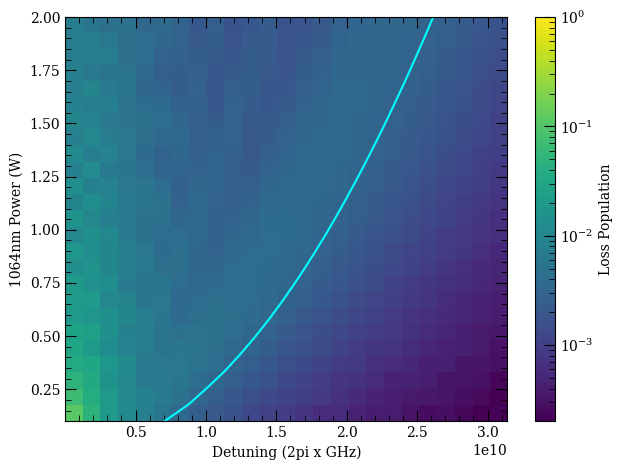

time: 7min 1s (started: 2024-04-22 17:09:42 -07:00)


In [4]:
coupling_powers = np.linspace(0.1, 2, 25)
detunings = np.linspace(2 * np.pi * 1e5, 2 * np.pi * 5e9, 25)
probe_peak_power = 1e-3
rydnamics.plot_lindblad_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power)